## 피마 인디언 당뇨병 예측

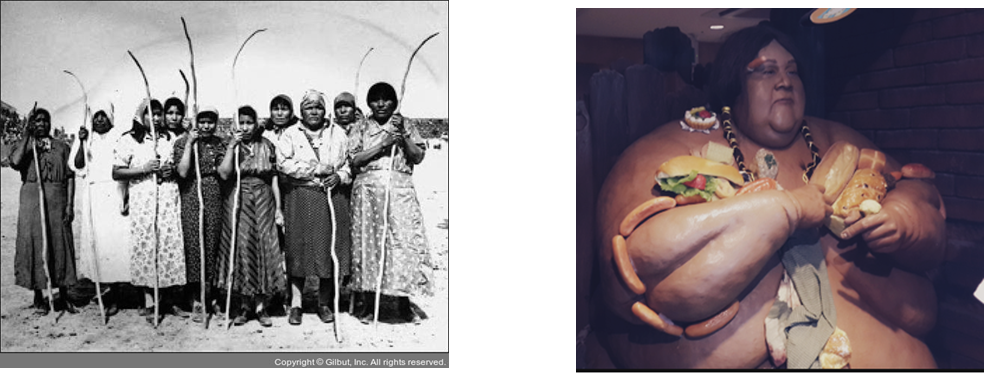

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("./dataset/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [3]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X = dataset.iloc[:, :-1]
y = dataset['Outcome']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

In [6]:
lr = LogisticRegression()

In [8]:
lr.fit(X_train,y_train)

LogisticRegression()

In [9]:
pred_y = lr.predict(X_test)

### 평가

In [15]:
def get_clf_eval(y_test, pred):
    consusion = confusion_matrix(y_test, pred)
    # 정확도
    accuracy = accuracy_score(y_test,pred)
    # 정밀도
    precision = precision_score(y_test,pred)
    # 재현율
    recall = recall_score(y_test,pred)
    
    
    print(consusion)
    print("정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}".format(accuracy,precision,recall))

In [16]:
get_clf_eval(y_test,pred_y)

[[88 12]
 [23 31]]
정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741


In [19]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    predisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, predisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='--', label='recall')
    
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.legend()
    plt.grid()
    plt.show()

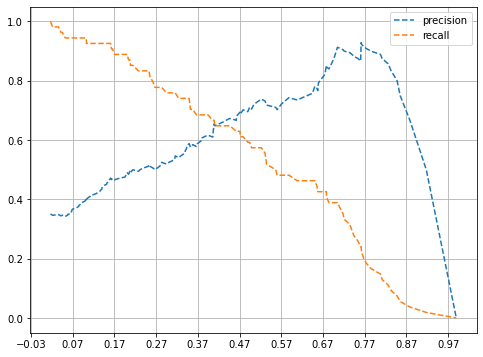

In [20]:
pred_proba_c1 = lr.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [21]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 0이 들어있는 feature 확인

In [23]:
zero_featres = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count = dataset['Glucose'].count()

for feature in zero_featres:
    zero_count = dataset[dataset[feature] == 0][feature].count()
    print("{0} 0 건수 : {1}, 점유율 {2:.2f}%".format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수 : 5, 점유율 0.65%
BloodPressure 0 건수 : 35, 점유율 4.56%
SkinThickness 0 건수 : 227, 점유율 29.56%
Insulin 0 건수 : 374, 점유율 48.70%
BMI 0 건수 : 11, 점유율 1.43%


#### 0 값을 평균값으로 대체

In [24]:
dataset[zero_featres] = dataset[zero_featres].replace(0, dataset[zero_featres].mean())

In [27]:
def get_clf_eval(y_test, pred, pred_proba):
    # 오차행렬
    consusion = confusion_matrix(y_test, pred)
    # 정확도
    accuracy = accuracy_score(y_test,pred)
    # 정밀도
    precision = precision_score(y_test,pred)
    # 재현율
    recall = recall_score(y_test,pred)
    
    
    # F1 scoe
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    
    print(consusion)
    print("정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, \
          F1 : {:.4f}, AUC : {:.4F}".format(accuracy,precision,recall,f1,roc_auc))

In [33]:
X = dataset.iloc[:, :-1]
y = dataset['Outcome']

# 스케일링 적용
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)
lr = LogisticRegression()
lr.fit(X_train,y_train)

pred_y = lr.predict(X_test)

pred_proba = lr.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred_y,pred_proba)

[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,           F1 : 0.6804, AUC : 0.8433


In [34]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\n임계값 : ",custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)

In [35]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)


임계값 :  0.3
[[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율 : 0.7963,           F1 : 0.6615, AUC : 0.8433

임계값 :  0.33
[[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율 : 0.7778,           F1 : 0.6774, AUC : 0.8433

임계값 :  0.36
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222,           F1 : 0.6667, AUC : 0.8433

임계값 :  0.39
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 : 0.7037,           F1 : 0.6667, AUC : 0.8433

임계값 :  0.42
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 : 0.6667,           F1 : 0.6792, AUC : 0.8433

임계값 :  0.45
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 : 0.6667,           F1 : 0.6857, AUC : 0.8433

임계값 :  0.48
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481,           F1 : 0.6931, AUC : 0.8433

임계값 :  0.5
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,           F1 : 0.6804, AUC : 0.8433


In [36]:
binarizer = Binarizer(threshold=0.48)
pred_th48 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test,pred_th48,pred_proba[:,1])

[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481,           F1 : 0.6931, AUC : 0.8433


- F1 : 정밀도+재현율